In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas dataframe
df = pd.read_csv("pluralsight_courses.csv")

# Print the first 5 rows of the dataframe
print(df.head())

                           CourseId                               CourseTitle  \
0              abts-advanced-topics  BizTalk 2006 Business Process Management   
1                 abts-fundamentals                 BizTalk 2006 Fundamentals   
2  agile-team-practice-fundamentals           Agile Team Practices with Scrum   
3               appsrv-fundamentals     Windows Server AppFabric Fundamentals   
4         aspdotnet-advanced-topics               ASP.NET 3.5 Advanced Topics   

   DurationInSeconds ReleaseDate  \
0              22198  2008-10-25   
1              24305  2008-06-01   
2              13504  2010-04-15   
3                  0  2000-01-01   
4              21611  2008-12-05   

                                         Description AssessmentStatus  \
0  This course covers Business Process Management...             Live   
1  Despite the trend towards service-oriented arc...             Live   
2  This course is much different than most of the...             Live   
3   

count      8016.000000
mean      10075.399202
std        7009.711935
min           0.000000
25%        5638.250000
50%        8570.000000
75%       12804.250000
max      184479.000000
Name: DurationInSeconds, dtype: float64


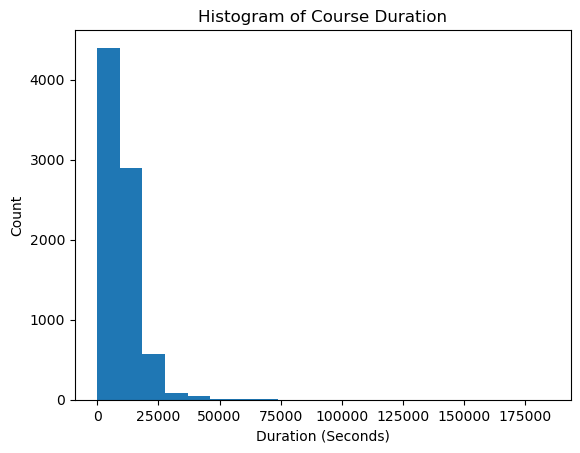

In [8]:
# Print the basic statistics of the DurationInSeconds column
print(df["DurationInSeconds"].describe())

# Create a histogram of the DurationInSeconds column
plt.hist(df["DurationInSeconds"], bins=20)
plt.title("Histogram of Course Duration")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Count")
plt.show()

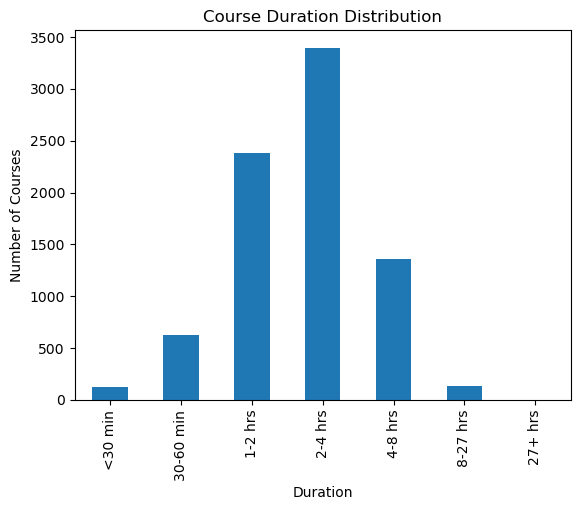

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bin edges
bins = [0, 1800, 3600, 7200, 14400, 28800, 97200, float('inf')]

# Define bin labels
labels = ['<30 min', '30-60 min', '1-2 hrs', '2-4 hrs', '4-8 hrs', '8-27 hrs', '27+ hrs']

# Cut data into bins and count number of courses in each bin
duration_bins = pd.cut(df['DurationInSeconds'], bins=bins, labels=labels)

# Group the data by duration range and count the number of courses within each range
duration_counts = duration_bins.groupby(duration_bins).size()

# Create bar plot of duration counts
duration_counts.plot(kind='bar')
plt.title("Course Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Number of Courses")
plt.show()


In [26]:
print(duration_bins)

0       4-8 hrs
1       4-8 hrs
2       2-4 hrs
3           NaN
4       4-8 hrs
         ...   
8011    1-2 hrs
8012    1-2 hrs
8013    1-2 hrs
8014    2-4 hrs
8015    2-4 hrs
Name: DurationInSeconds, Length: 8016, dtype: category
Categories (7, object): ['<30 min' < '30-60 min' < '1-2 hrs' < '2-4 hrs' < '4-8 hrs' < '8-27 hrs' < '27+ hrs']


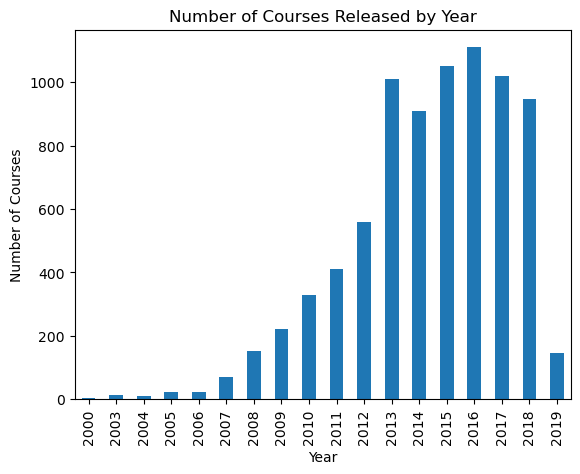

In [18]:
# Convert ReleaseDate to datetime format
df["ReleaseDateConverted"] = pd.to_datetime(df["ReleaseDate"])

# Group courses by year and count the number of courses for each year
course_counts = df.groupby(df["ReleaseDateConverted"].dt.year)["CourseId"].count()

# Create a bar chart of course counts by year
course_counts.plot(kind="bar")
plt.title("Number of Courses Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Courses")
plt.show()

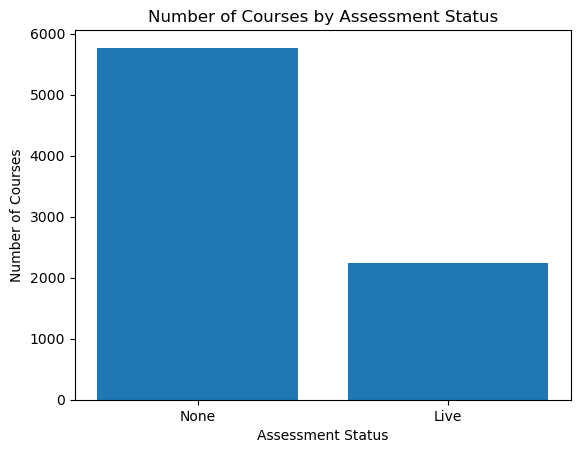

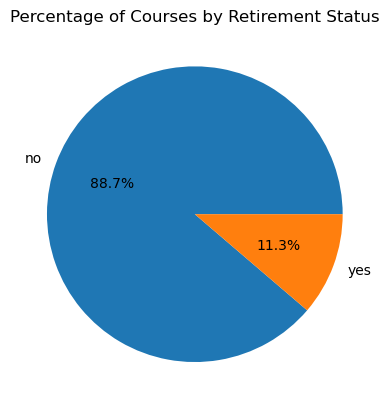

In [19]:
# Count the number of courses in each assessment status category
status_counts = df['AssessmentStatus'].value_counts()

# Create a bar chart of the assessment status counts
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Assessment Status')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Assessment Status')
plt.show()

# Count the number of courses in each retirement category
retirement_counts = df['IsCourseRetired'].value_counts()

# Create a pie chart of the retirement counts
plt.pie(retirement_counts.values, labels=retirement_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Courses by Retirement Status')
plt.show()


     -------------------------------------- 153.3/153.3 kB 1.1 MB/s eta 0:00:00


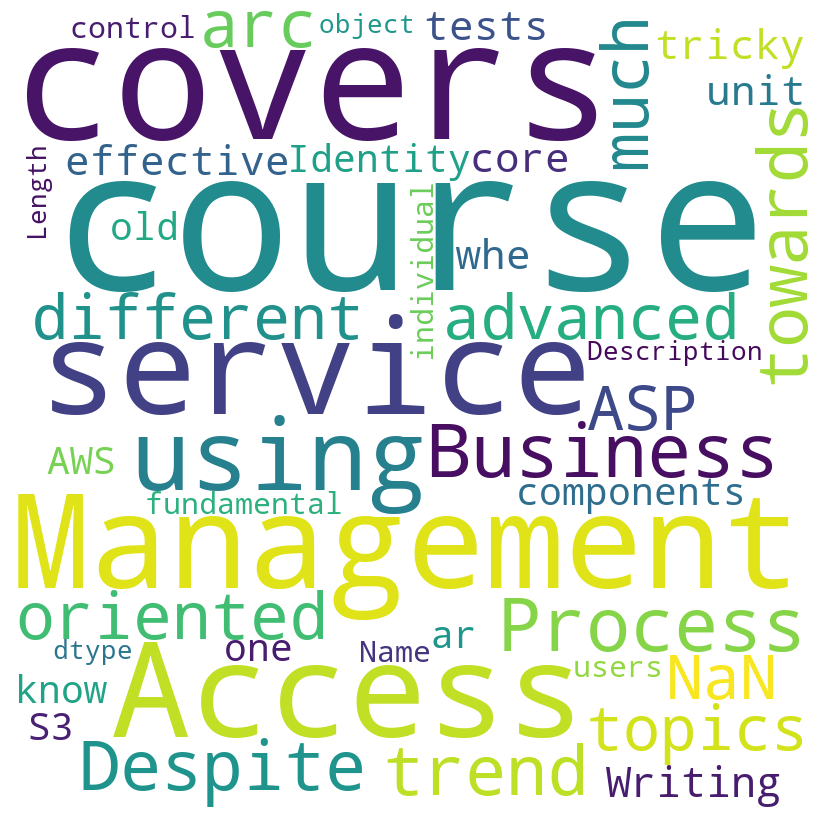

In [22]:
# Create a word cloud of the Description column
%pip install wordcloud

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(str(df["Description"]))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## these are data preparation steps 

In [30]:
text_data_df = df[['CourseId','CourseTitle','Description']]
missing_values = text_data_df.isnull().sum()
missing_values

CourseId       0
CourseTitle    0
Description    5
dtype: int64

In [33]:
text_data_df.dropna(subset=['Description'], inplace=True)
missing_values = text_data_df.isnull().sum()
missing_values

C:\Users\Abirr\AppData\Local\Temp\ipykernel_20568\2828167976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_df.dropna(subset=['Description'], inplace=True)


CourseId       0
CourseTitle    0
Description    0
dtype: int64

In [ ]:
# Lowercasing the data
text_data_df['CourseTitle_Lowercased'] = text_data_df['CourseTitle'].str.lower()
text_data_df['Description_Lowercased'] = text_data_df['Description'].str.lower()

In [ ]:
# Tokenizing the data 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_data_df['CourseTitle_tokens'] = text_data_df['CourseTitle_Lowercased'].apply(word_tokenize)
text_data_df['Description_tokens'] = text_data_df['Description_Lowercased'].apply(word_tokenize)

In [ ]:
# Filtering stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

text_data_df['CourseTitle_noStop'] = text_data_df['CourseTitle_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
text_data_df['Description_noStop'] = text_data_df['Description_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Lemmatization 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
text_data_df['CourseTitle_lemmatized'] = text_data_df['CourseTitle_noStop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
text_data_df['Description_lemmatized'] = text_data_df['Description_noStop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Select Preprocessed Data
preprocessed_df = text_data_df[['CourseId','CourseTitle_lemmatized','Description_lemmatized']]
preprocessed_df = preprocessed_df.reset_index(drop=True)

In [ ]:
# Concatenate the title + description into one full text content column
title_desc = []
for i in range(preprocessed_df.shape[0]):
    title_desc.append(' '.join(preprocessed_df['CourseTitle_lemmatized'][i]) + ' ' + ' '.join(preprocessed_df['Description_lemmatized'][i]))

# add the concatenated text as a new column in the dataframe
preprocessed_df['title_desc'] = title_desc